In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# directories and data
data_directory = "/home/edgar/odrive/portfolio/astropology/data/agn_lcs/"
lc_directory = f"{data_directory}/lcs"

w_distances = np.load(
    f"{data_directory}/agn_wasserstein_40736_series.npy",
    mmap_mode="r" 
)
objectid_w = np.load(
    f"{data_directory}/objid_agn_wasserstein_40736_series.npy",
    mmap_mode="r"
).astype(int)

b_distances = np.load(
    f"{data_directory}/agn_bottleneck_40736_series.npy",
    mmap_mode="r" 
)
objectid_b = np.load(
    f"{data_directory}/objid_agn_bottleneck_40736_series.npy",
    mmap_mode="r"
).astype(int)

In [3]:
w_score = np.empty(w_distances.shape[0])

for idx, score in enumerate(w_distances):

    w_score[idx] = np.nanmean(score)

w_score *= 1/np.max(w_score)
w_rank = np.argsort(w_score)
w_ranked_objectid = objectid_w[w_rank]
######
b_score = np.empty(b_distances.shape[0])

for idx, score in enumerate(b_distances):

    b_score[idx] = np.nanmean(score)

b_score *= 1/np.max(b_score)
b_rank = np.argsort(b_score)
b_ranked_objectid = objectid_b[b_rank]

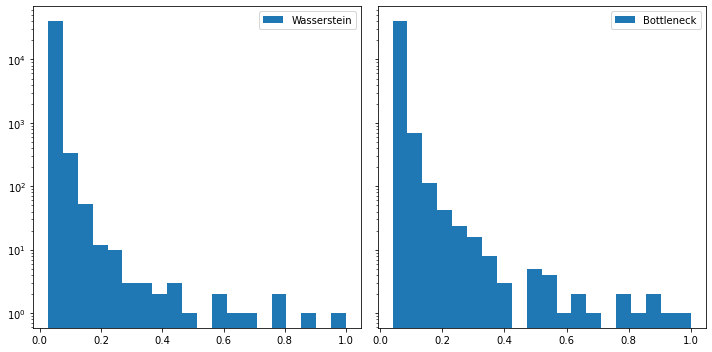

In [4]:
fig, axs = plt.subplots(
    sharey=True, ncols=2, nrows=1, tight_layout=True,
    figsize=(10, 5)
)
bins = 20
_ = axs[0].hist(w_score, bins=bins, label="Wasserstein")
_ = axs[1].hist(b_score, bins=bins, label="Bottleneck")
for ax in axs: ax.set_yscale("log"), ax.legend()

In [5]:
cadence = np.empty((w_score.size, 2))

for idx, objectid in enumerate(objectid_w):

    lc = np.loadtxt(f"{lc_directory}/{objectid}.dat")

    cadence[idx, 0] = lc.shape[0]
    cadence[idx, 1] = w_score[idx]

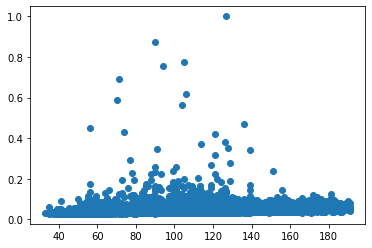

In [6]:
plt.scatter(cadence[:, 0], cadence[:, 1])
# plt.hlines(
#     xmin=cadence[:, 0].min(),
#     xmax=cadence[:, 0].max(),
#     y=[0.15, 0.45],
#     color="black"
# )

# _ = plt.hist2d(
#     cadence[:, 1], cadence[:, 0],
#     bins=100,
#     cmap="gray_r"
# )
# plt.xlim(0.02, 0.2)
# plt.colorbar()

Save top 400 Wasserstein anomalies and top 100 normal lcs

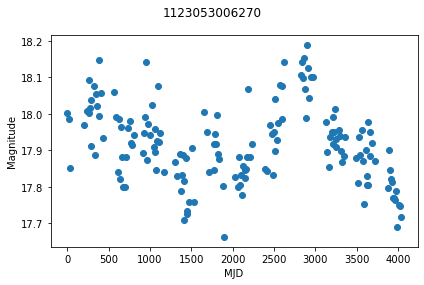

In [22]:
# anomalies
fig, ax = plt.subplots(
    tight_layout=True,
    # figsize=(8, 5)
)

for rank in range(1, 401):

    rank *= -1
    objectid = w_ranked_objectid[rank]
    lc = np.loadtxt(f"{lc_directory}/{objectid}.dat")

    mjd = lc[:, 0]
    mag = lc[:, 1]
    error_mag = lc[:, 2]

    ax.clear()

    fig.suptitle(objectid)

    ax.scatter(mjd, mag)
    
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude")
    
    # plt.show()

    save_to = "/home/edgar/Downloads/agn/wasserstein/anomaly"
    
    if os.path.exists(save_to) is False:
    
        os.makedirs(save_to)
        
    fig.savefig(f"{save_to}/{abs(rank):03d}_{objectid}.pdf")

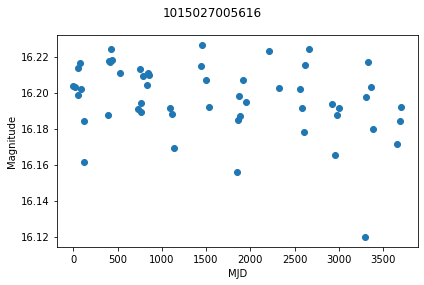

In [23]:
# normal
fig, ax = plt.subplots(
    tight_layout=True,
    # figsize=(8, 5)
)

for rank in range(0, 100):

    rank *= 1
    objectid = w_ranked_objectid[rank]
    lc = np.loadtxt(f"{lc_directory}/{objectid}.dat")

    mjd = lc[:, 0]
    mag = lc[:, 1]
    error_mag = lc[:, 2]

    ax.clear()

    fig.suptitle(objectid)

    ax.scatter(mjd, mag)
    
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude")
    
    # plt.show()

    save_to = "/home/edgar/Downloads/agn/wasserstein/normal"
    
    if os.path.exists(save_to) is False:
    
        os.makedirs(save_to)
        
    fig.savefig(f"{save_to}/{abs(rank):03d}_{objectid}.pdf")

Save top 400 anomalies and top 100 normal from bottleneck distance

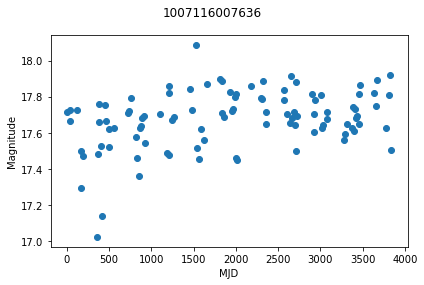

In [24]:
# anomaly
fig, ax = plt.subplots(
    tight_layout=True,
    # figsize=(8, 5)
)

for rank in range(1, 401):

    rank *= -1
    objectid = b_ranked_objectid[rank]
    lc = np.loadtxt(f"{lc_directory}/{objectid}.dat")

    mjd = lc[:, 0]
    mag = lc[:, 1]
    error_mag = lc[:, 2]

    ax.clear()

    fig.suptitle(objectid)

    ax.scatter(mjd, mag)
    
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude")
    
    # plt.show()

    save_to = "/home/edgar/Downloads/agn/bottleneck/anomaly"
    
    if os.path.exists(save_to) is False:
    
        os.makedirs(save_to)

    fig.savefig(f"{save_to}/{abs(rank):03d}_{objectid}.pdf")


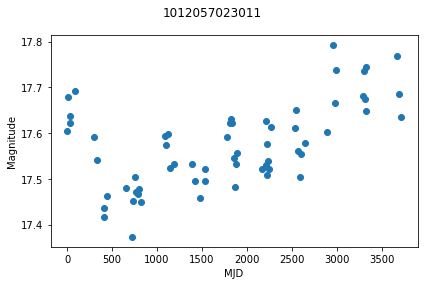

In [25]:
# normal
fig, ax = plt.subplots(
    tight_layout=True,
    # figsize=(8, 5)
)

for rank in range(0, 100):

    rank *= 1
    objectid = b_ranked_objectid[rank]
    lc = np.loadtxt(f"{lc_directory}/{objectid}.dat")

    mjd = lc[:, 0]
    mag = lc[:, 1]
    error_mag = lc[:, 2]

    ax.clear()

    fig.suptitle(objectid)

    ax.scatter(mjd, mag)
    
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude")
    
    # plt.show()

    save_to = "/home/edgar/Downloads/agn/bottleneck/normal"
    
    if os.path.exists(save_to) is False:
    
        os.makedirs(save_to)

    fig.savefig(f"{save_to}/{abs(rank):03d}_{objectid}.pdf")
